I've been asked to search for any common locations of the following 4 peptides within the human genome.

```
TNRTLKTQLVKQK
IIKLCGNDPDKIVVPLTKEQVR
KNSPHEGKLIWWKDNKNKTWEIGK
CTQQLRRDSDHRERAMMTMAVLSKRKGGNVGKSKRDQIVTVSV
```


As the human genome is only available as nucleotide sequence, I need to reverse translate these peptide seqeunces.

I wrote the following script, `peptide2nucleotide.py`, to convert the peptide sequence into a list of nucleotide sequences.

This is an exponential problem given than upto six trinucleotide sequences can result in a given amino acid. For the shortest sequence, this was not a problem, however the other three would produce, at minimum, billions of possible sequences which would require too much time or memory. 

To minimize this impact and speed up analysis, I broke up the longer reads into smaller, overlapping seqeunces.

```
TNRTLKTQLVKQK 
IIKLCGNDPDKIV DKIVVPLTKEQVR 
KNSPHEGKLIWWK WKDNKNKTWEIGK 
CTQQLRRDSDHRER HRERAMMTMAVLSK VLSKRKGGNVGKSK VGKSKRDQIVTVSV
```

I then reverse translated those on the cluster.

Producing nucleotide lists like ...

Containing ...

I then wrote a script to convert these sequences into a proper `fasta` files.

And did so for each on the cluster.

Producing ...

Containing ...

I then align each, `end-to-end` NOT `local`, to an `hg38` reference with `bowtie2` noteably using the `--all` flag to get all possible alignments within the bounds of the default scoring.

I was asked for exact matches only, so I'm ignoring any alignments that have an insertion, deletion or mismatch. This requires filtering on the `edit distance` which in `bowtie2` data uses the `NM` tag in the `sam/bam` file. I create exact `bam` files for each sequence filtering on `NM:i:0`,

And then merge all into a single `bam` file.

In [1]:
# fixes printing trailing "2004l"?
bind 'set enable-bracketed-paste off'

In [2]:
samtools view -c 20210602-HERV-Peptides/all.bam

497


In [3]:
samtools view 20210602-HERV-Peptides/all.bam | head

VGKSKRDQIVTVSV_61347248	256	chr1	1409808	255	42M	*	0	0	GTGGGGAAAAGCAAGAGAGATCAGATTGTTACTGTGTCTGTG	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:42	YT:Z:UU
VGKSKRDQIVTVSV_61347248	256	chr1	1580344	255	42M	*	0	0	GTGGGGAAAAGCAAGAGAGATCAGATTGTTACTGTGTCTGTG	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:42	YT:Z:UU
KNSPHEGKLIWWK_76773	272	chr1	13015624	255	39M	*	0	0	TTTCCACCAAATCAGTTTTCCTTCATGTGGGCTGTTCTT	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:39	YT:Z:UU
KNSPHEGKLIWWK_76773	256	chr1	13213298	255	39M	*	0	0	AAGAACAGCCCACATGAAGGAAAACTGATTTGGTGGAAA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:39	YT:Z:UU
KNSPHEGKLIWWK_76773	256	chr1	13359050	255	39M	*	0	0	AAGAACAGCCCACATGAAGGAAAACTGATTTGGTGGAAA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII	AS:i:0	XS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:39	YT:Z:

Let's find some popular regions to look at. Since we are looking for regions where everything aligned, let's just grab all of the chromosomes and positions, round the positions, then use `uniq -c` to count the contiguous occurences. (The bam file is already sorted so we don't have to do that.) Then we'll sort the results and print the last 20.

Here we'll round to 10,000.

In [4]:
samtools view 20210602-HERV-Peptides/all.bam | awk '{print $3,int($4/10000)*10000}' | uniq -c | sort -n | tail -20

      4 chr8 7490000
      5 chr1 160690000
      5 chr1 75380000
      5 chr19 27640000
      5 chr3 101690000
      5 chr5 156660000
      6 chr12 58330000
      6 chr3 125890000
      6 chr6 77720000
      6 chr8 7500000
      7 chr1 155620000
      7 chr11 118720000
      7 chr2 129960000
      7 chr3 113020000
      7 chr3 185560000
      8 chr11 101700000
      8 chr22 18940000
      9 chr10 99820000
      9 chr7 4580000
      9 chr7 4590000


And here we'll round to 100,000. We're just looking for popular regions to look at so it's not terribly important.

In [5]:
samtools view 20210602-HERV-Peptides/all.bam | awk '{print $3,int($4/100000)*100000}' | uniq -c | sort -n | tail -20

      4 chr8 7400000
      5 chr1 160600000
      5 chr3 101600000
      6 chr1 75300000
      6 chr5 30400000
      6 chr8 7500000
      7 chr2 129900000
      8 chr11 101700000
      8 chr11 118700000
      8 chr3 113000000
      8 chr3 125800000
      8 chr3 185500000
      8 chr5 156600000
      9 chr10 99800000
      9 chr12 58300000
      9 chr19 27600000
      9 chr22 18900000
     10 chr6 77700000
     11 chr1 155600000
     18 chr7 4500000


I've opened IGV with the hg38 genome and the `all.bam` file and will share some screen shots.

This is `chr7`

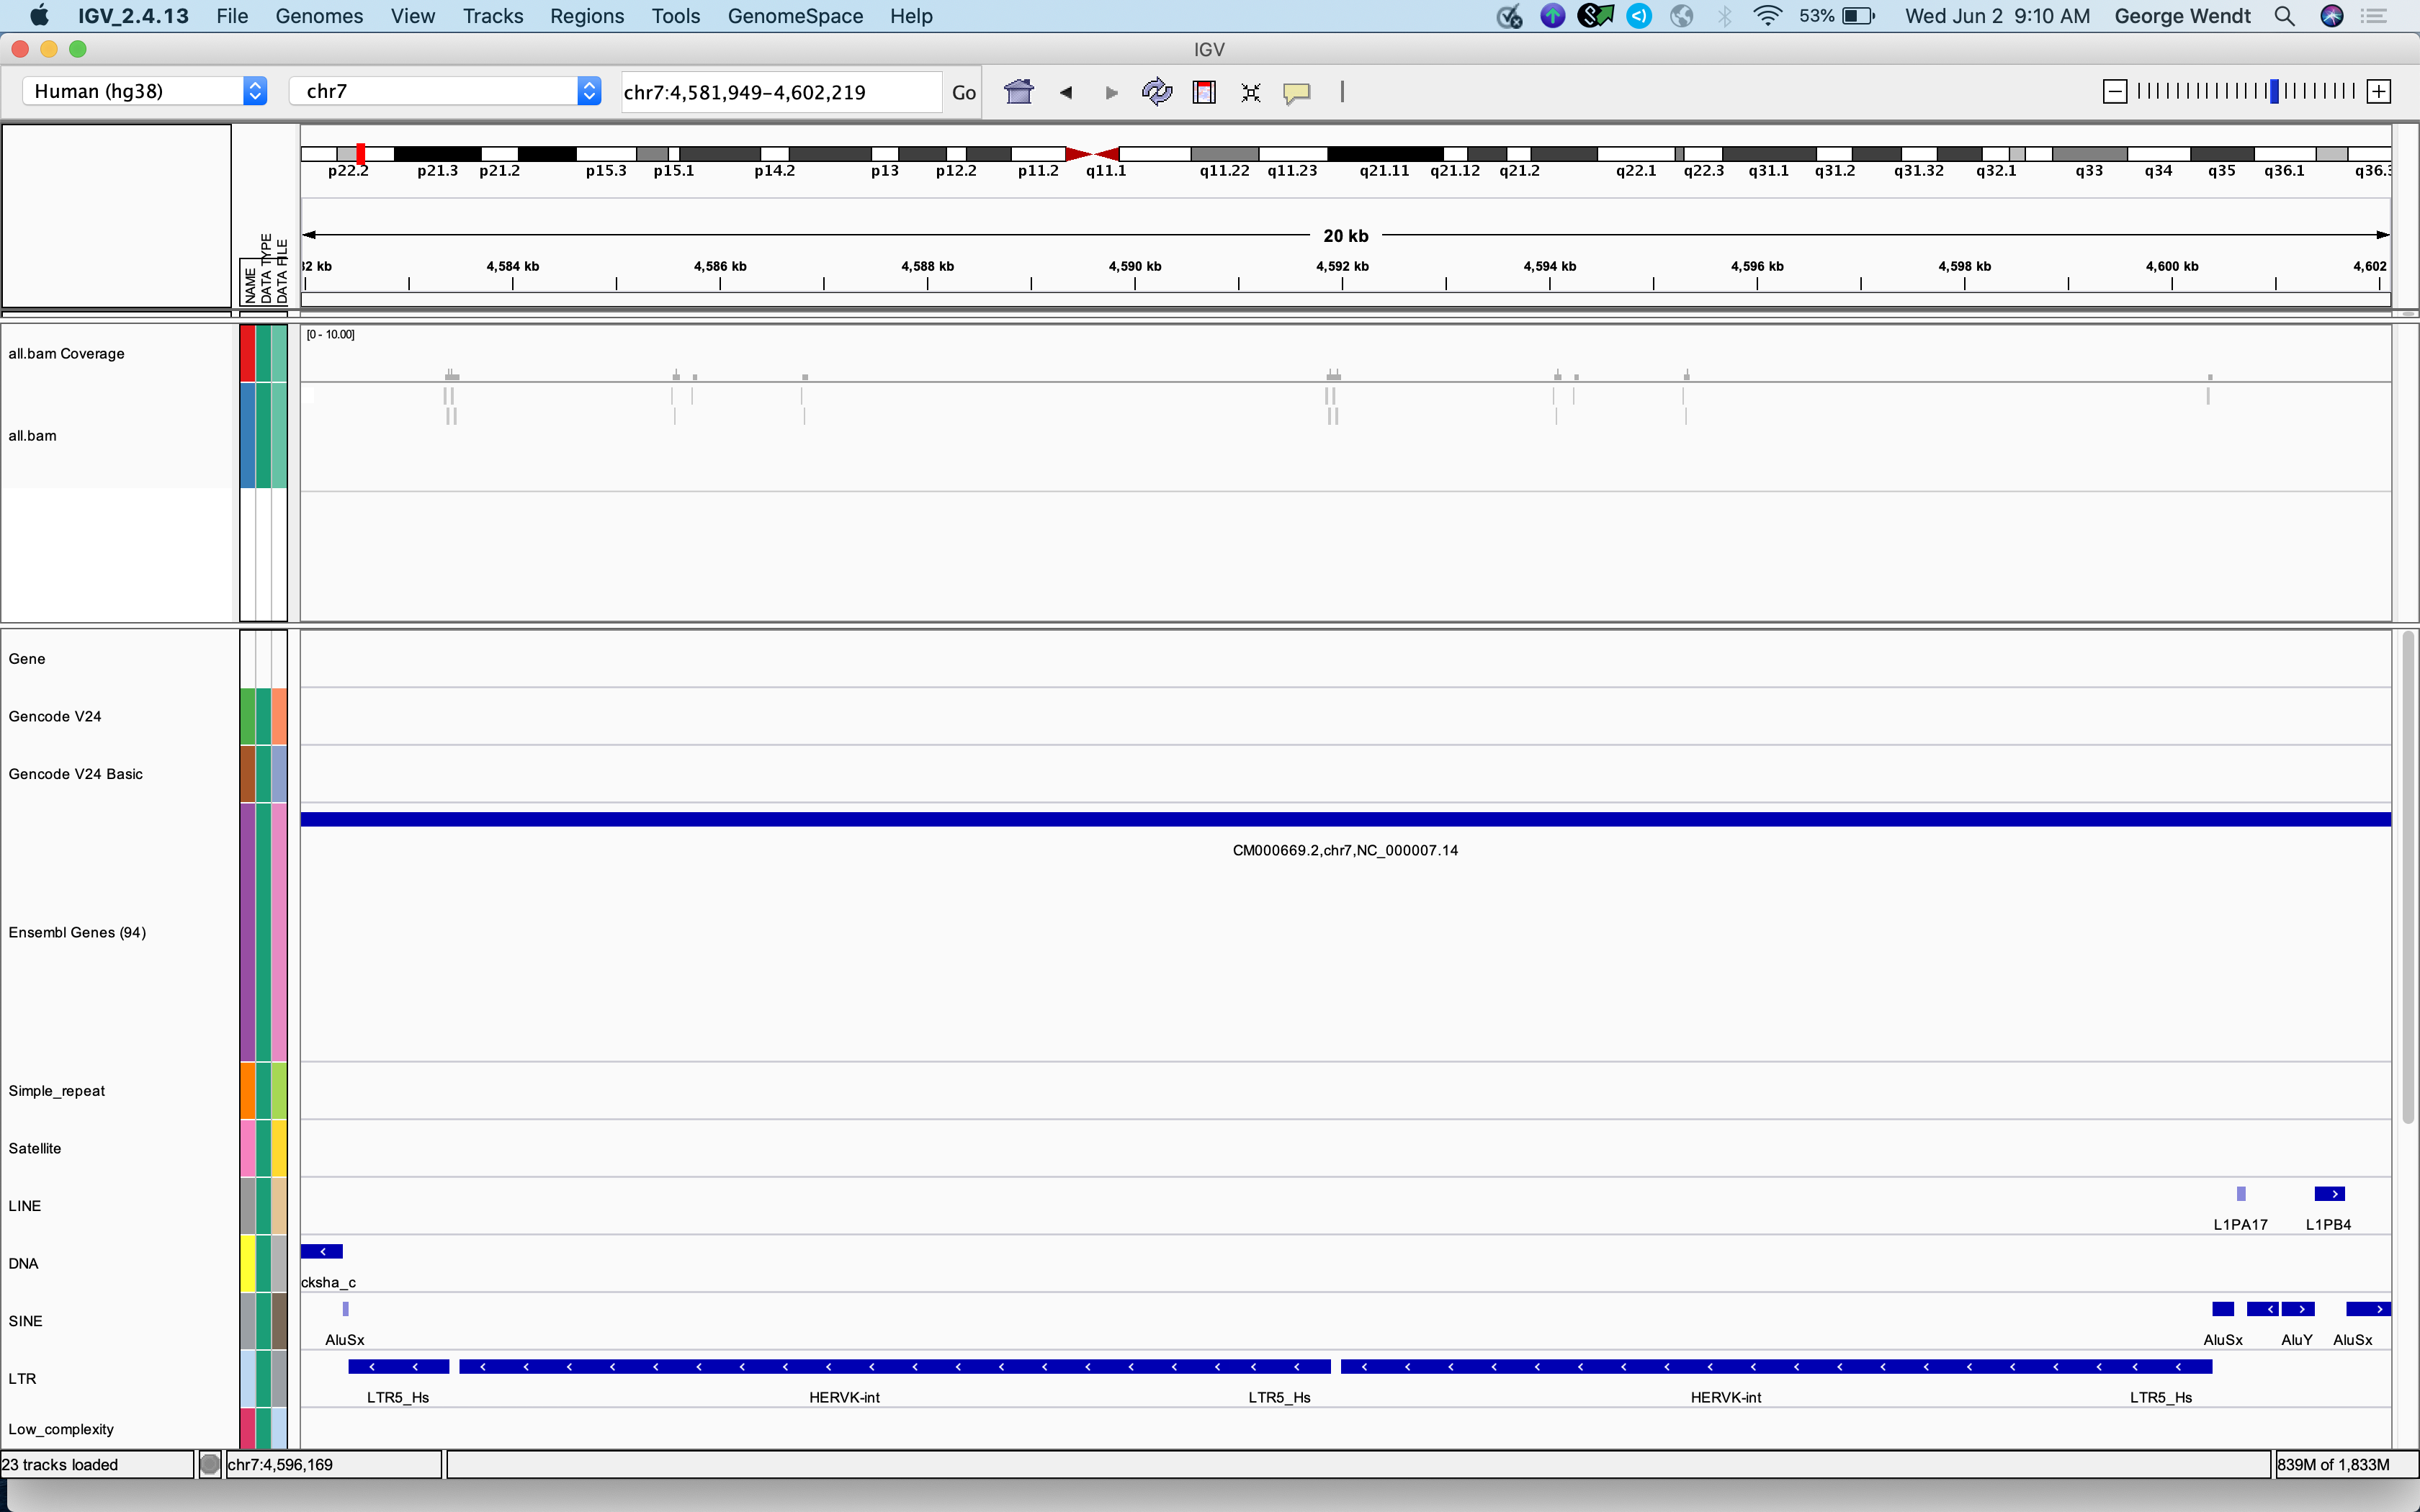

This is `chr1`

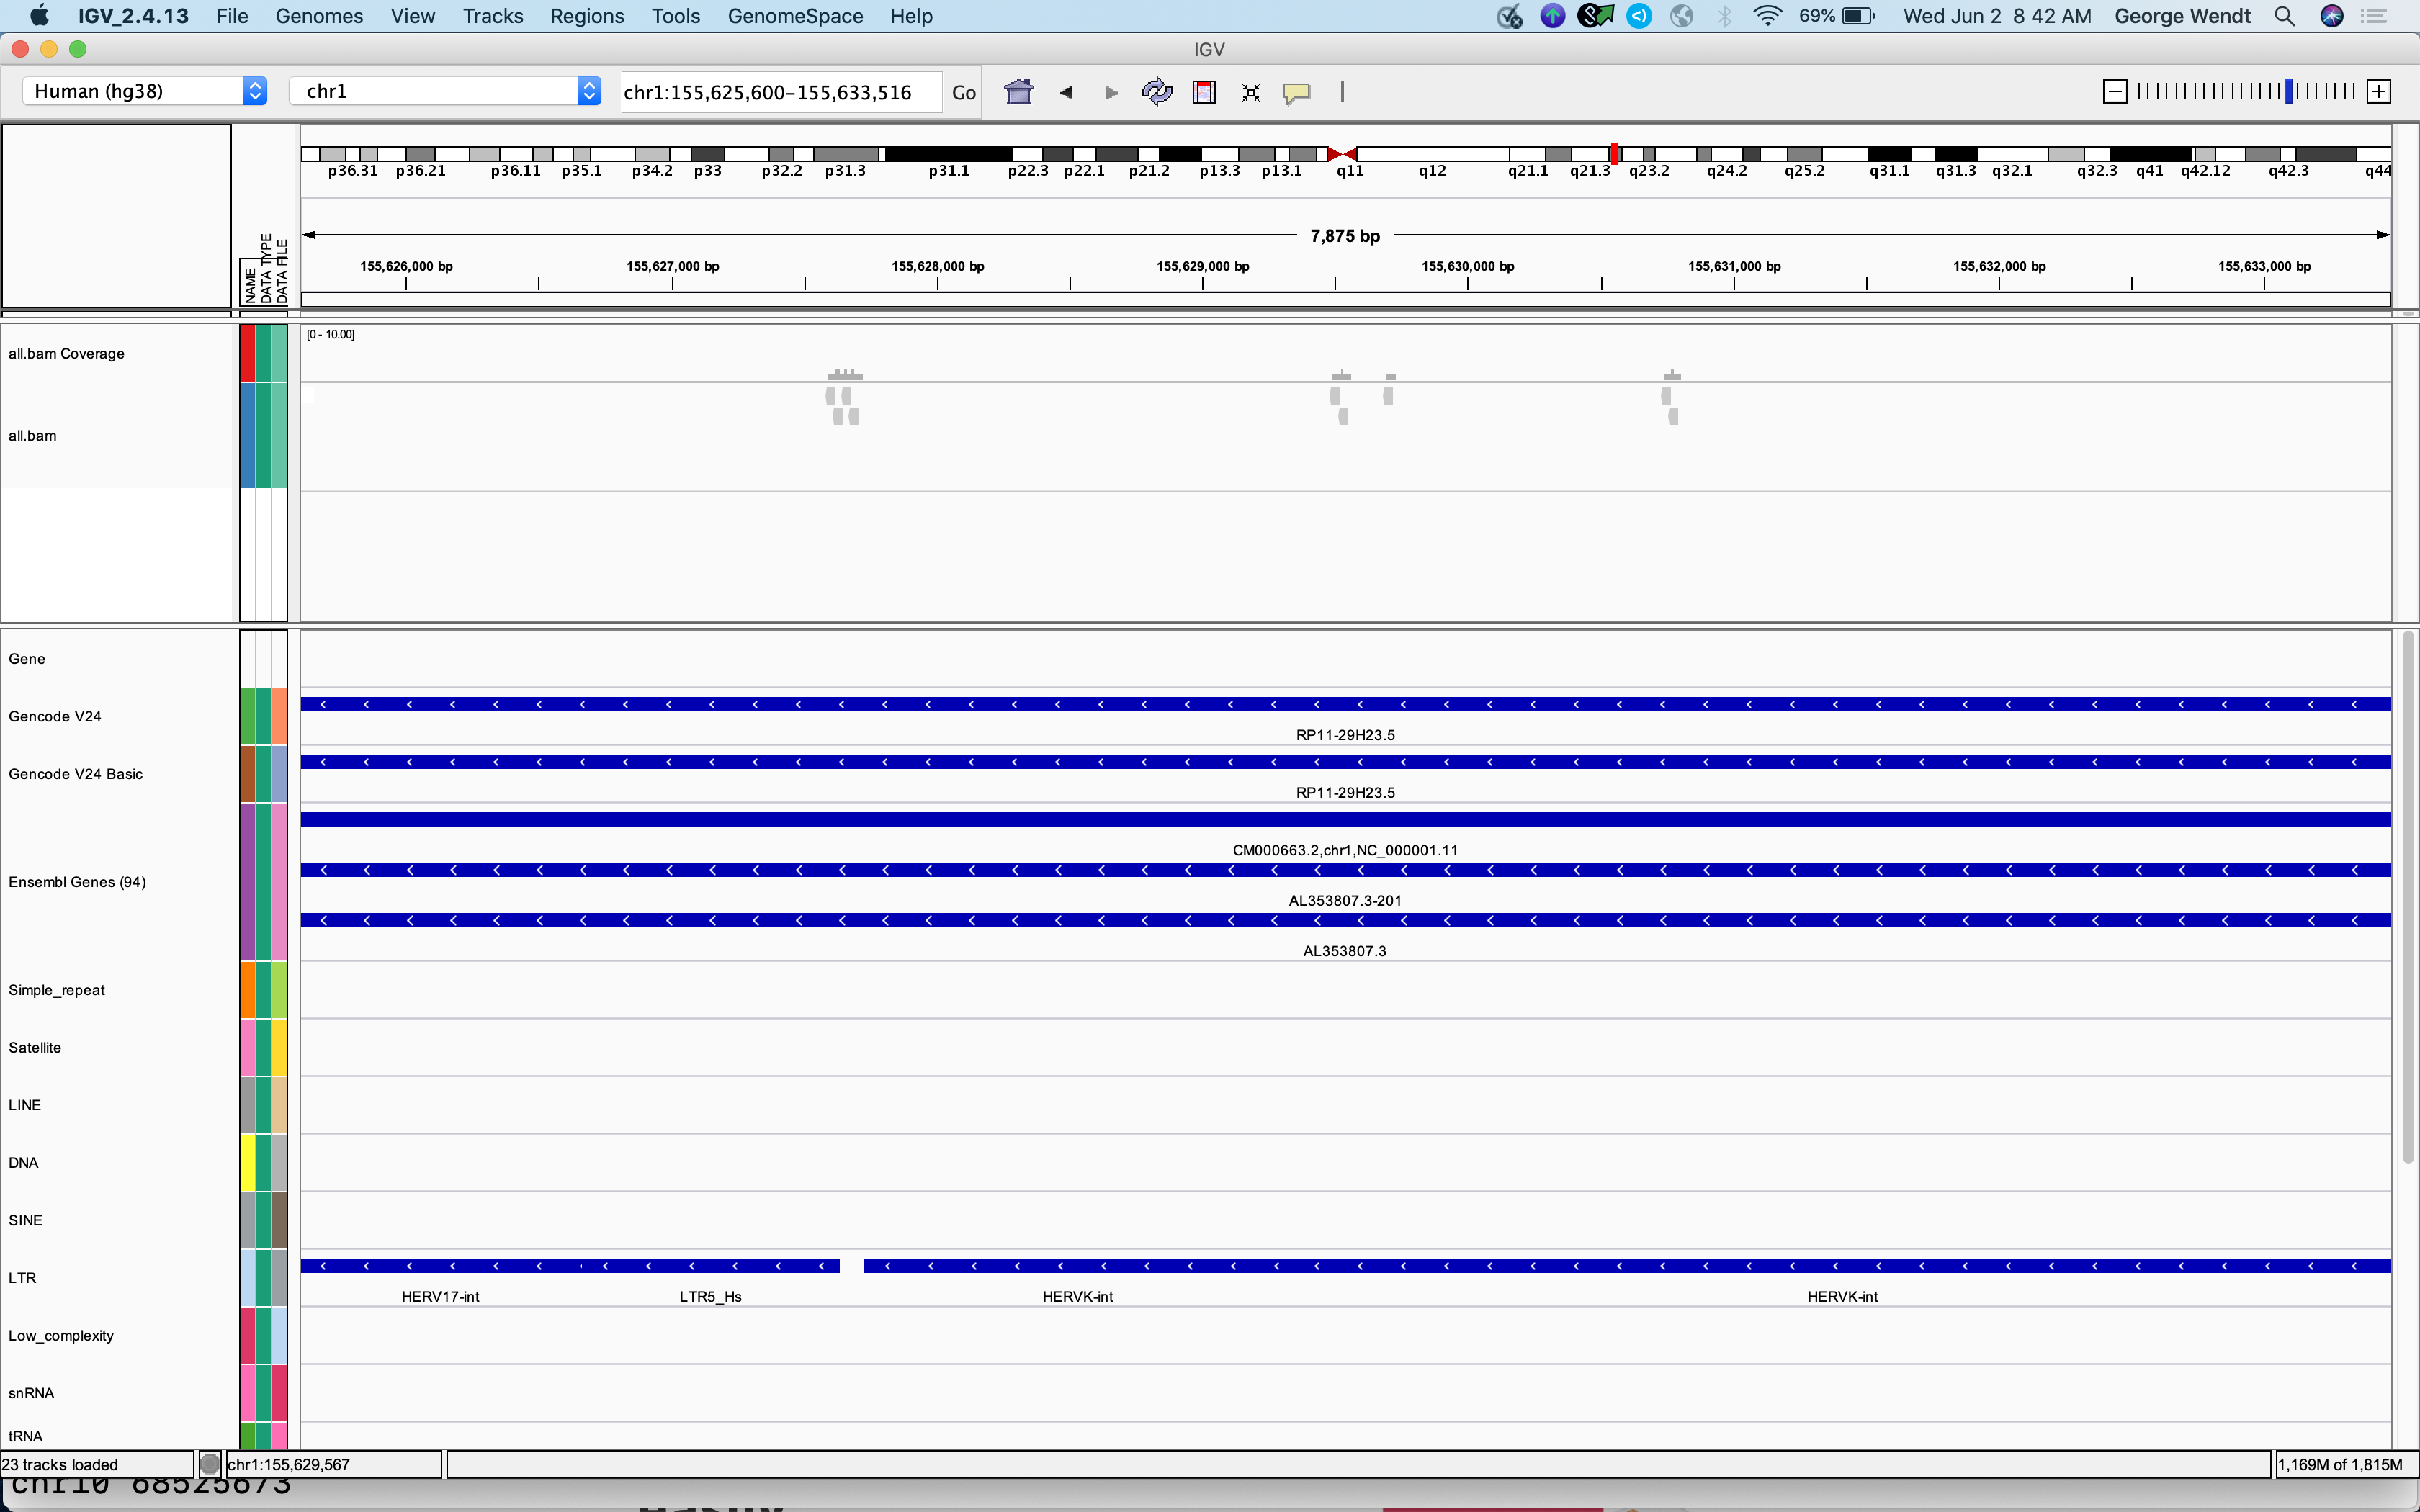

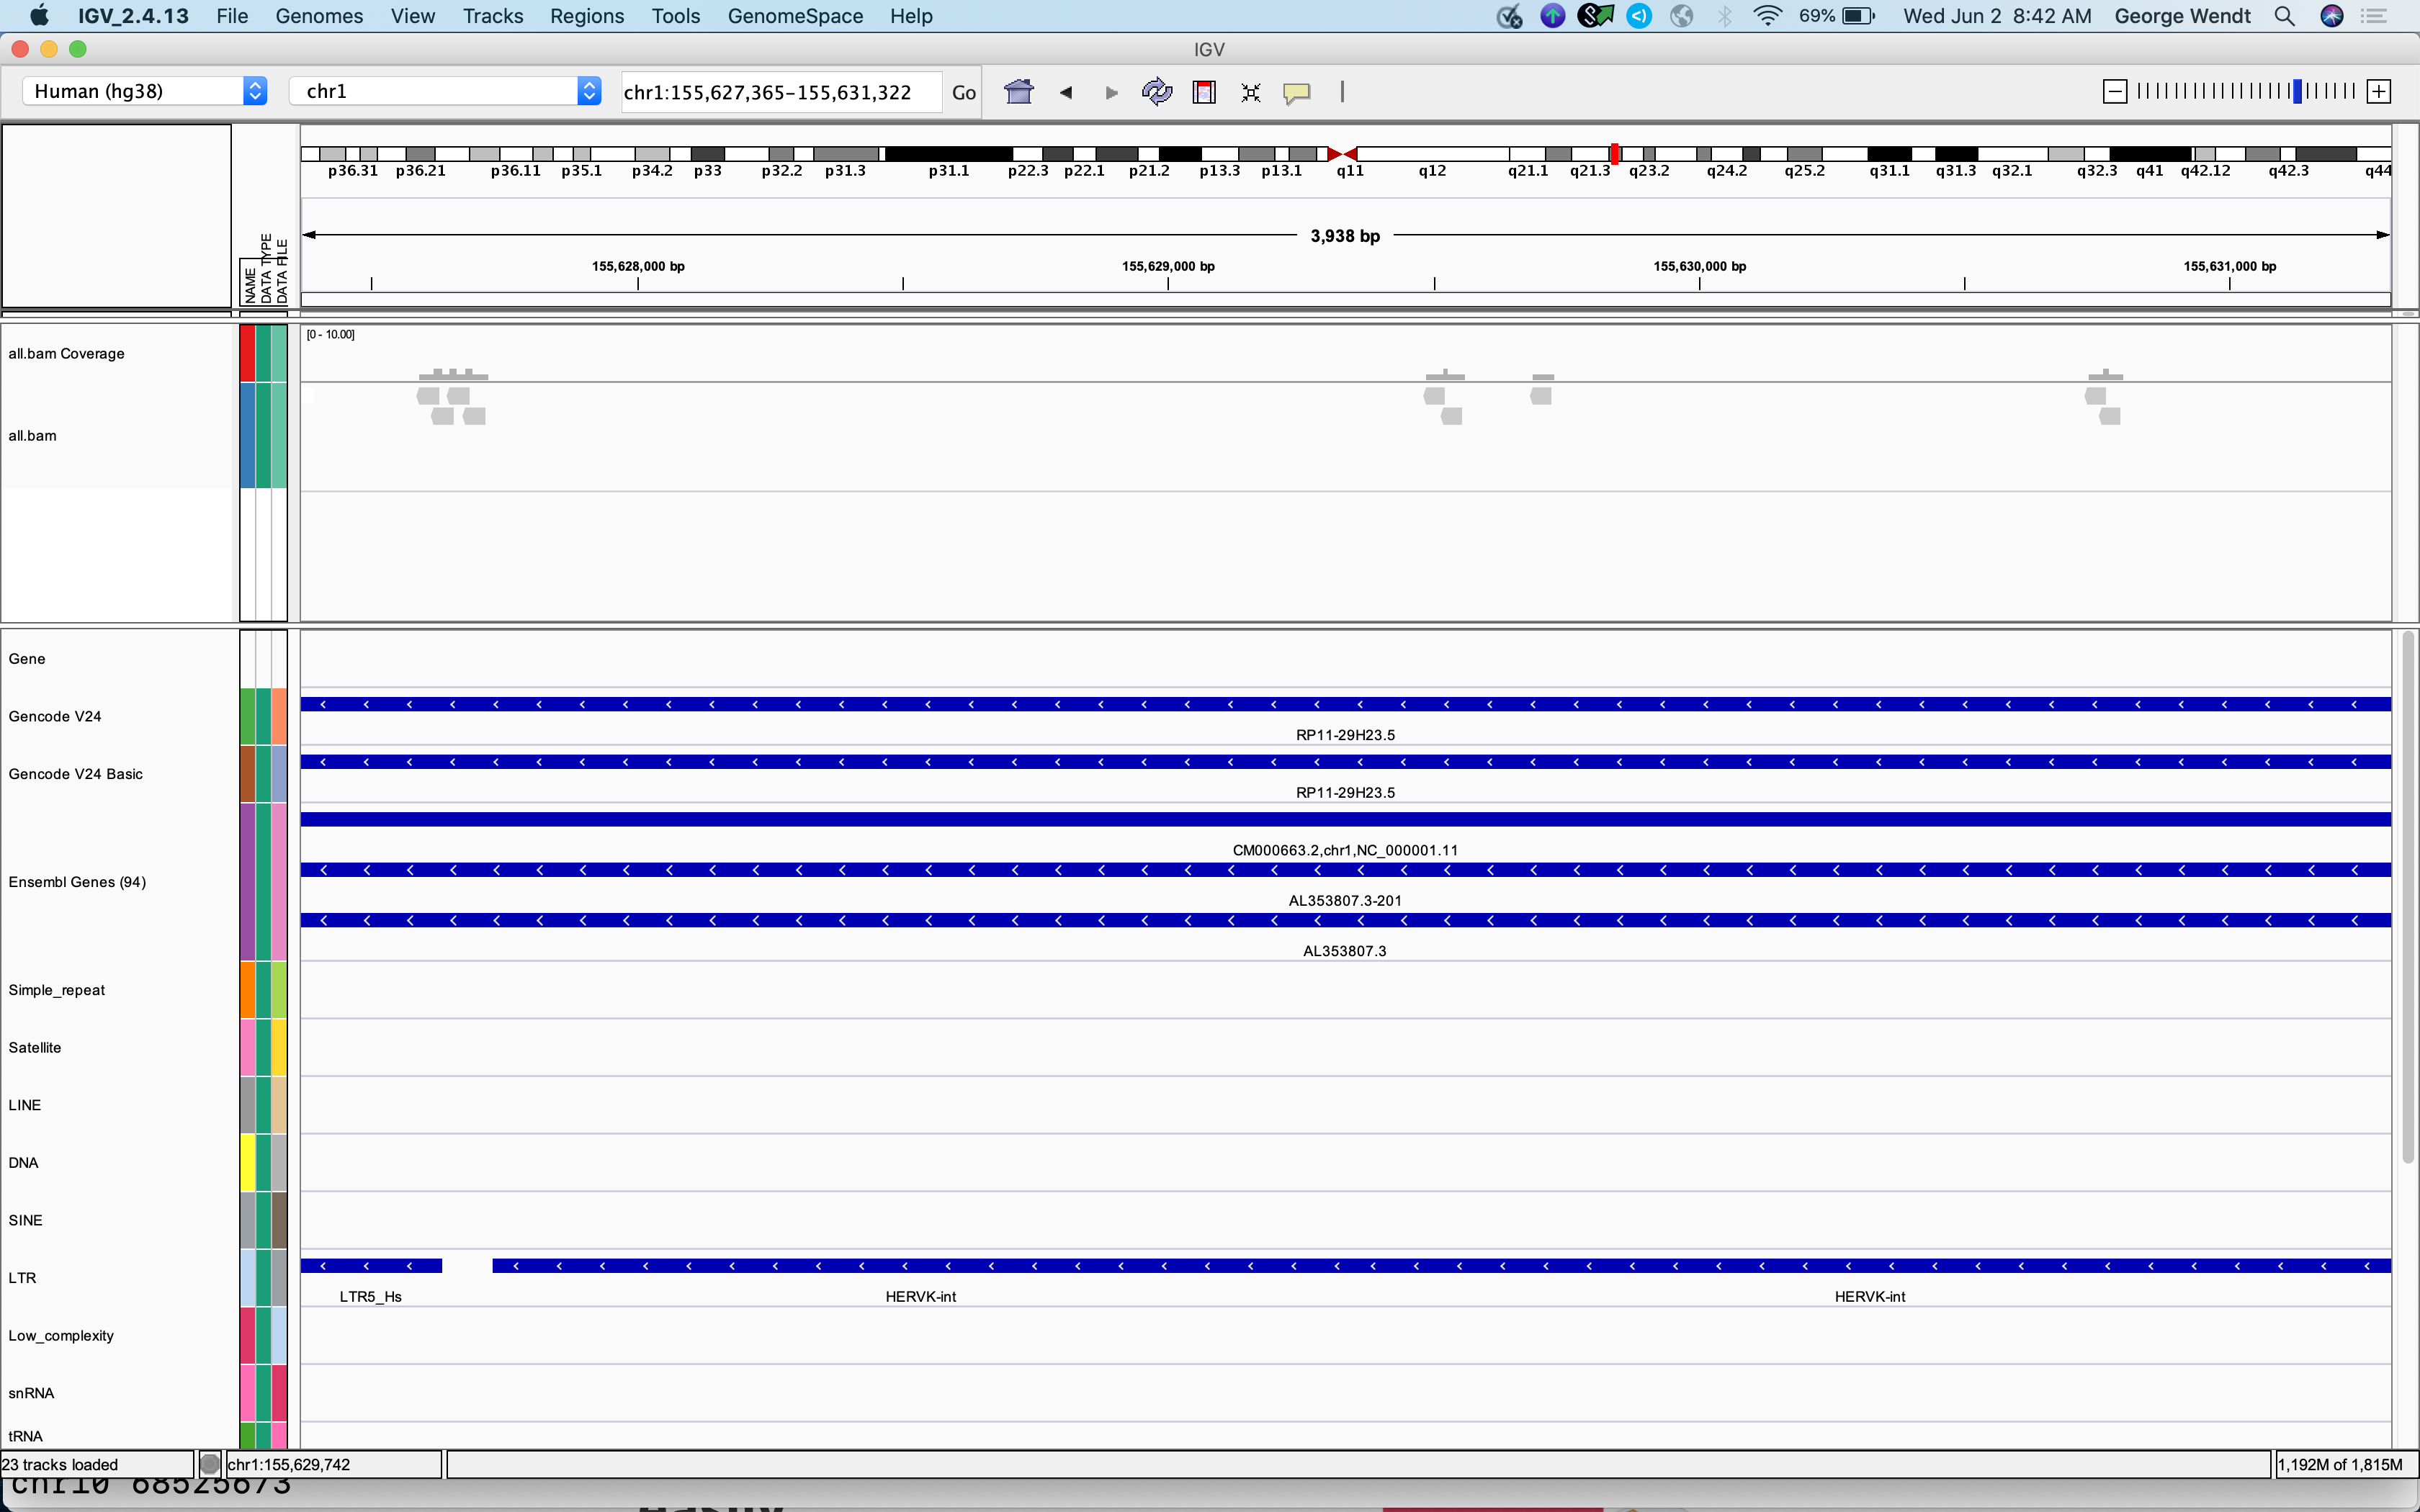

This is `chr6`

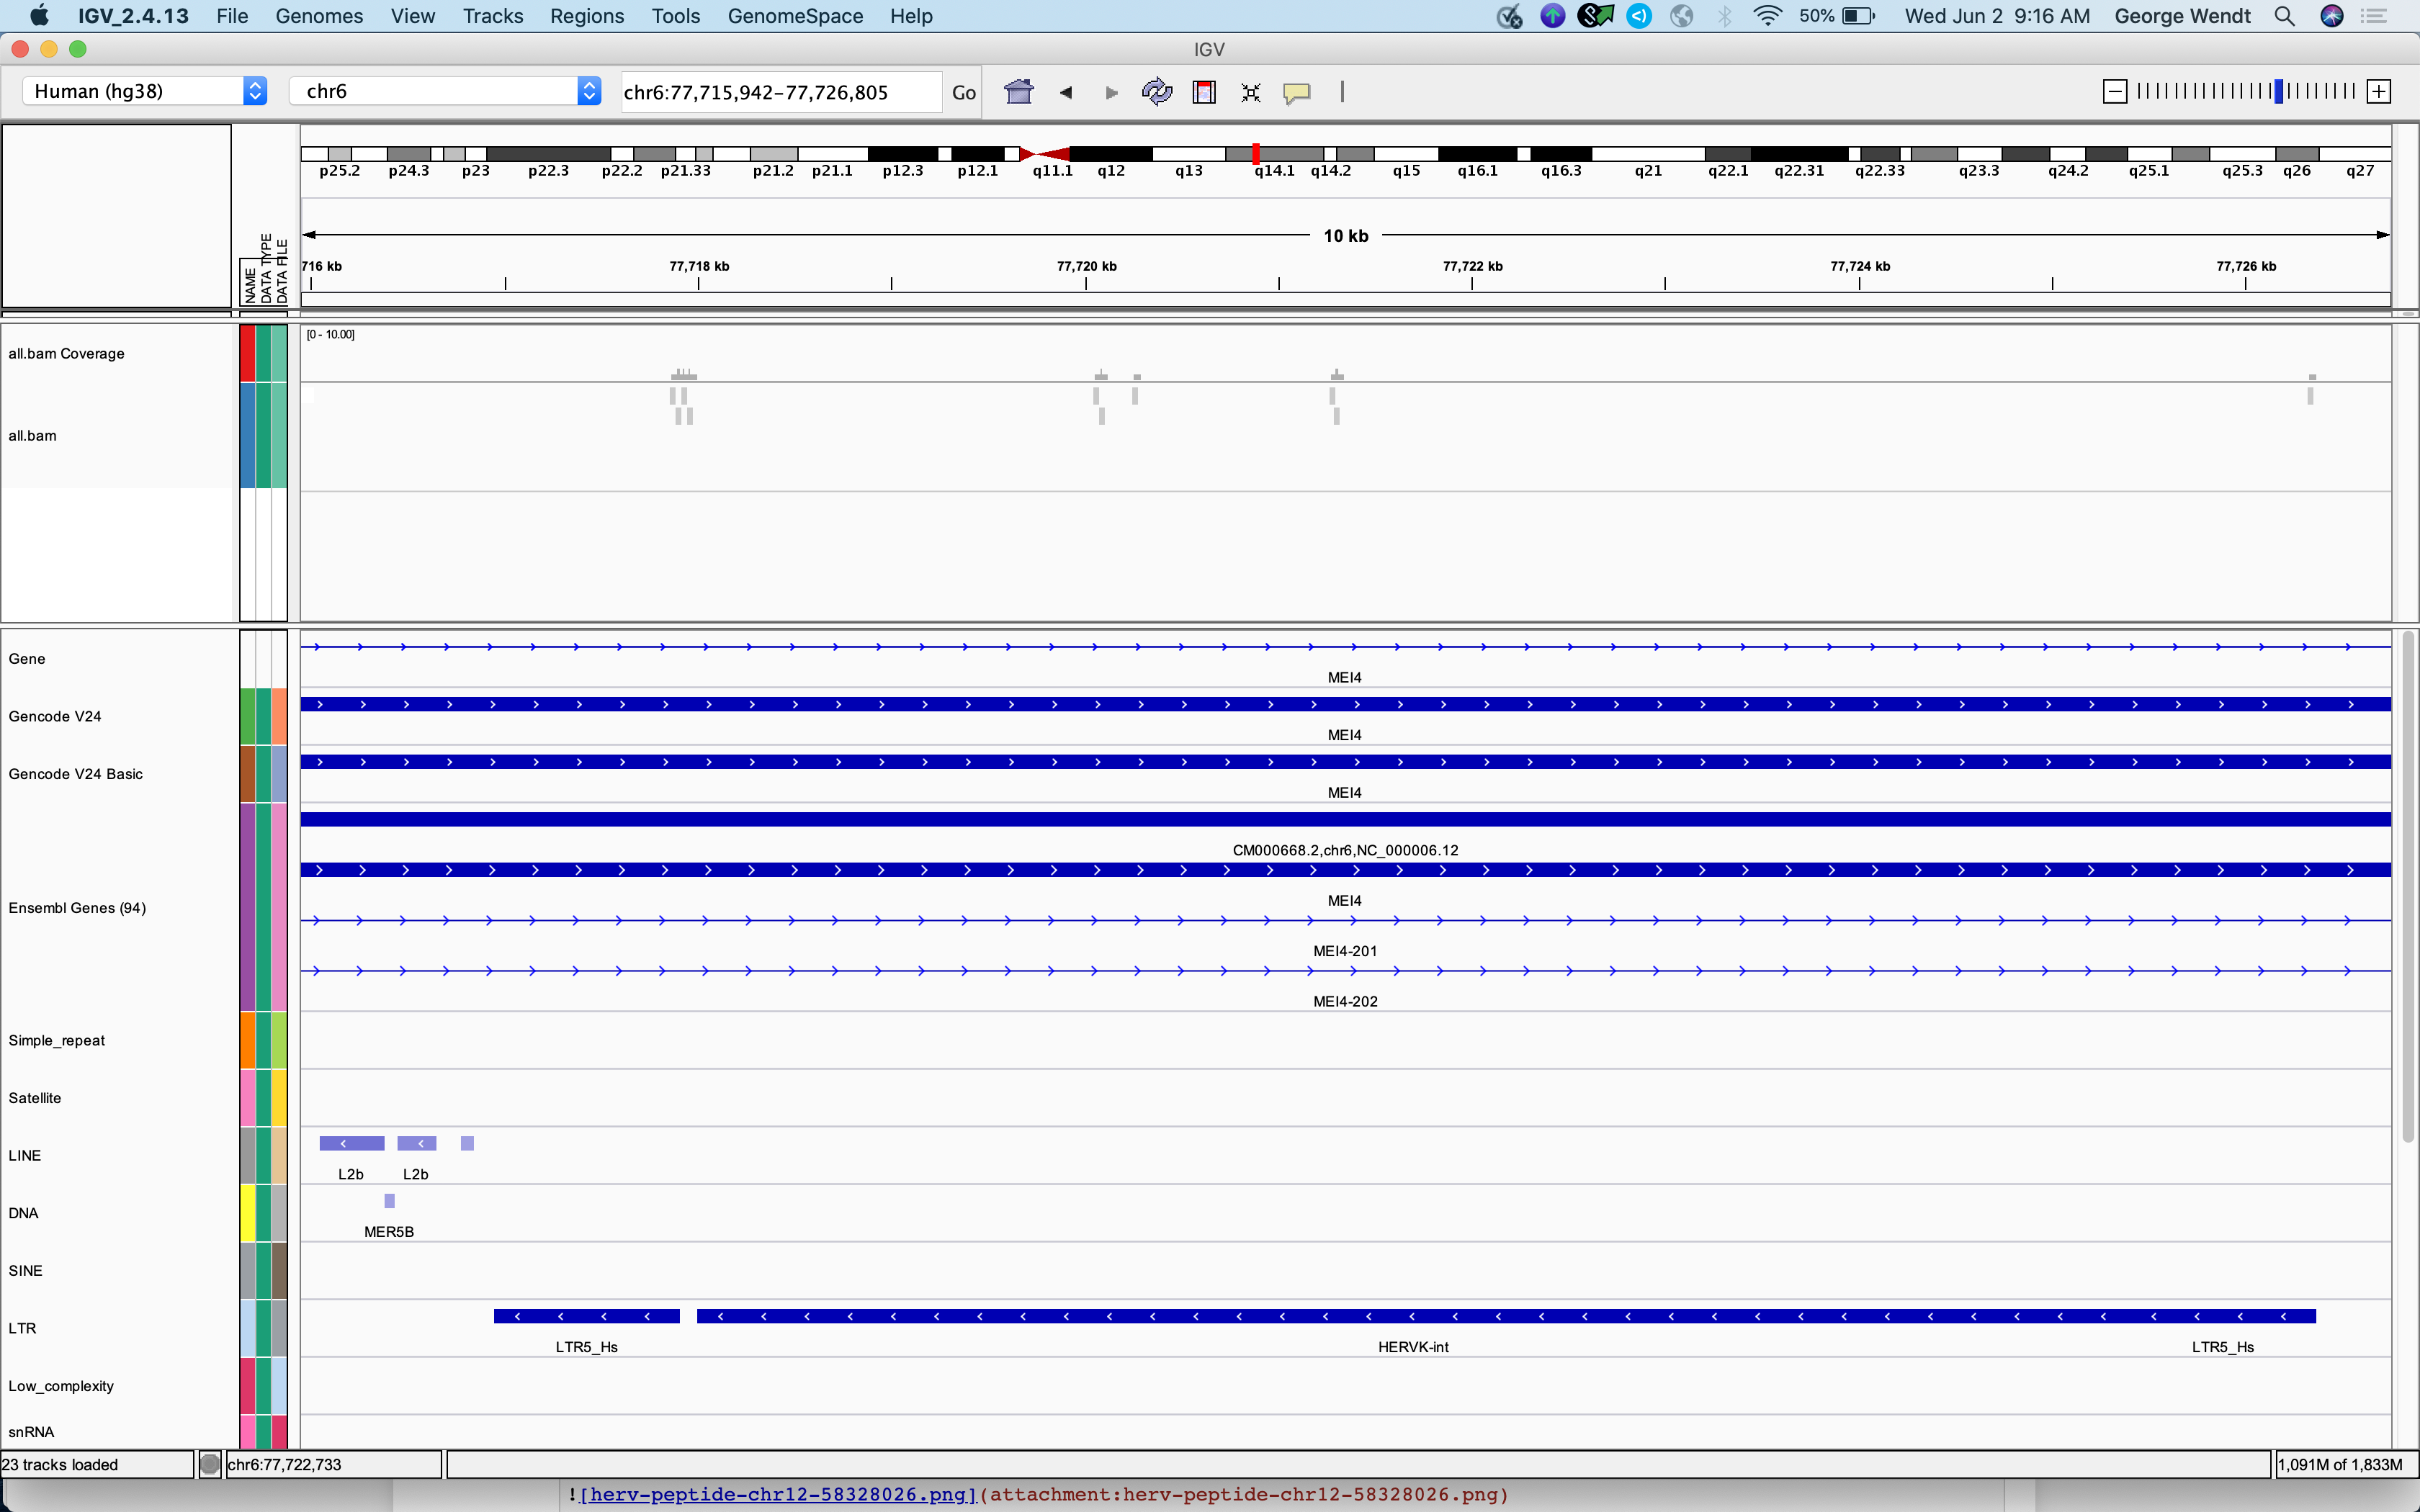

This is `chr10`

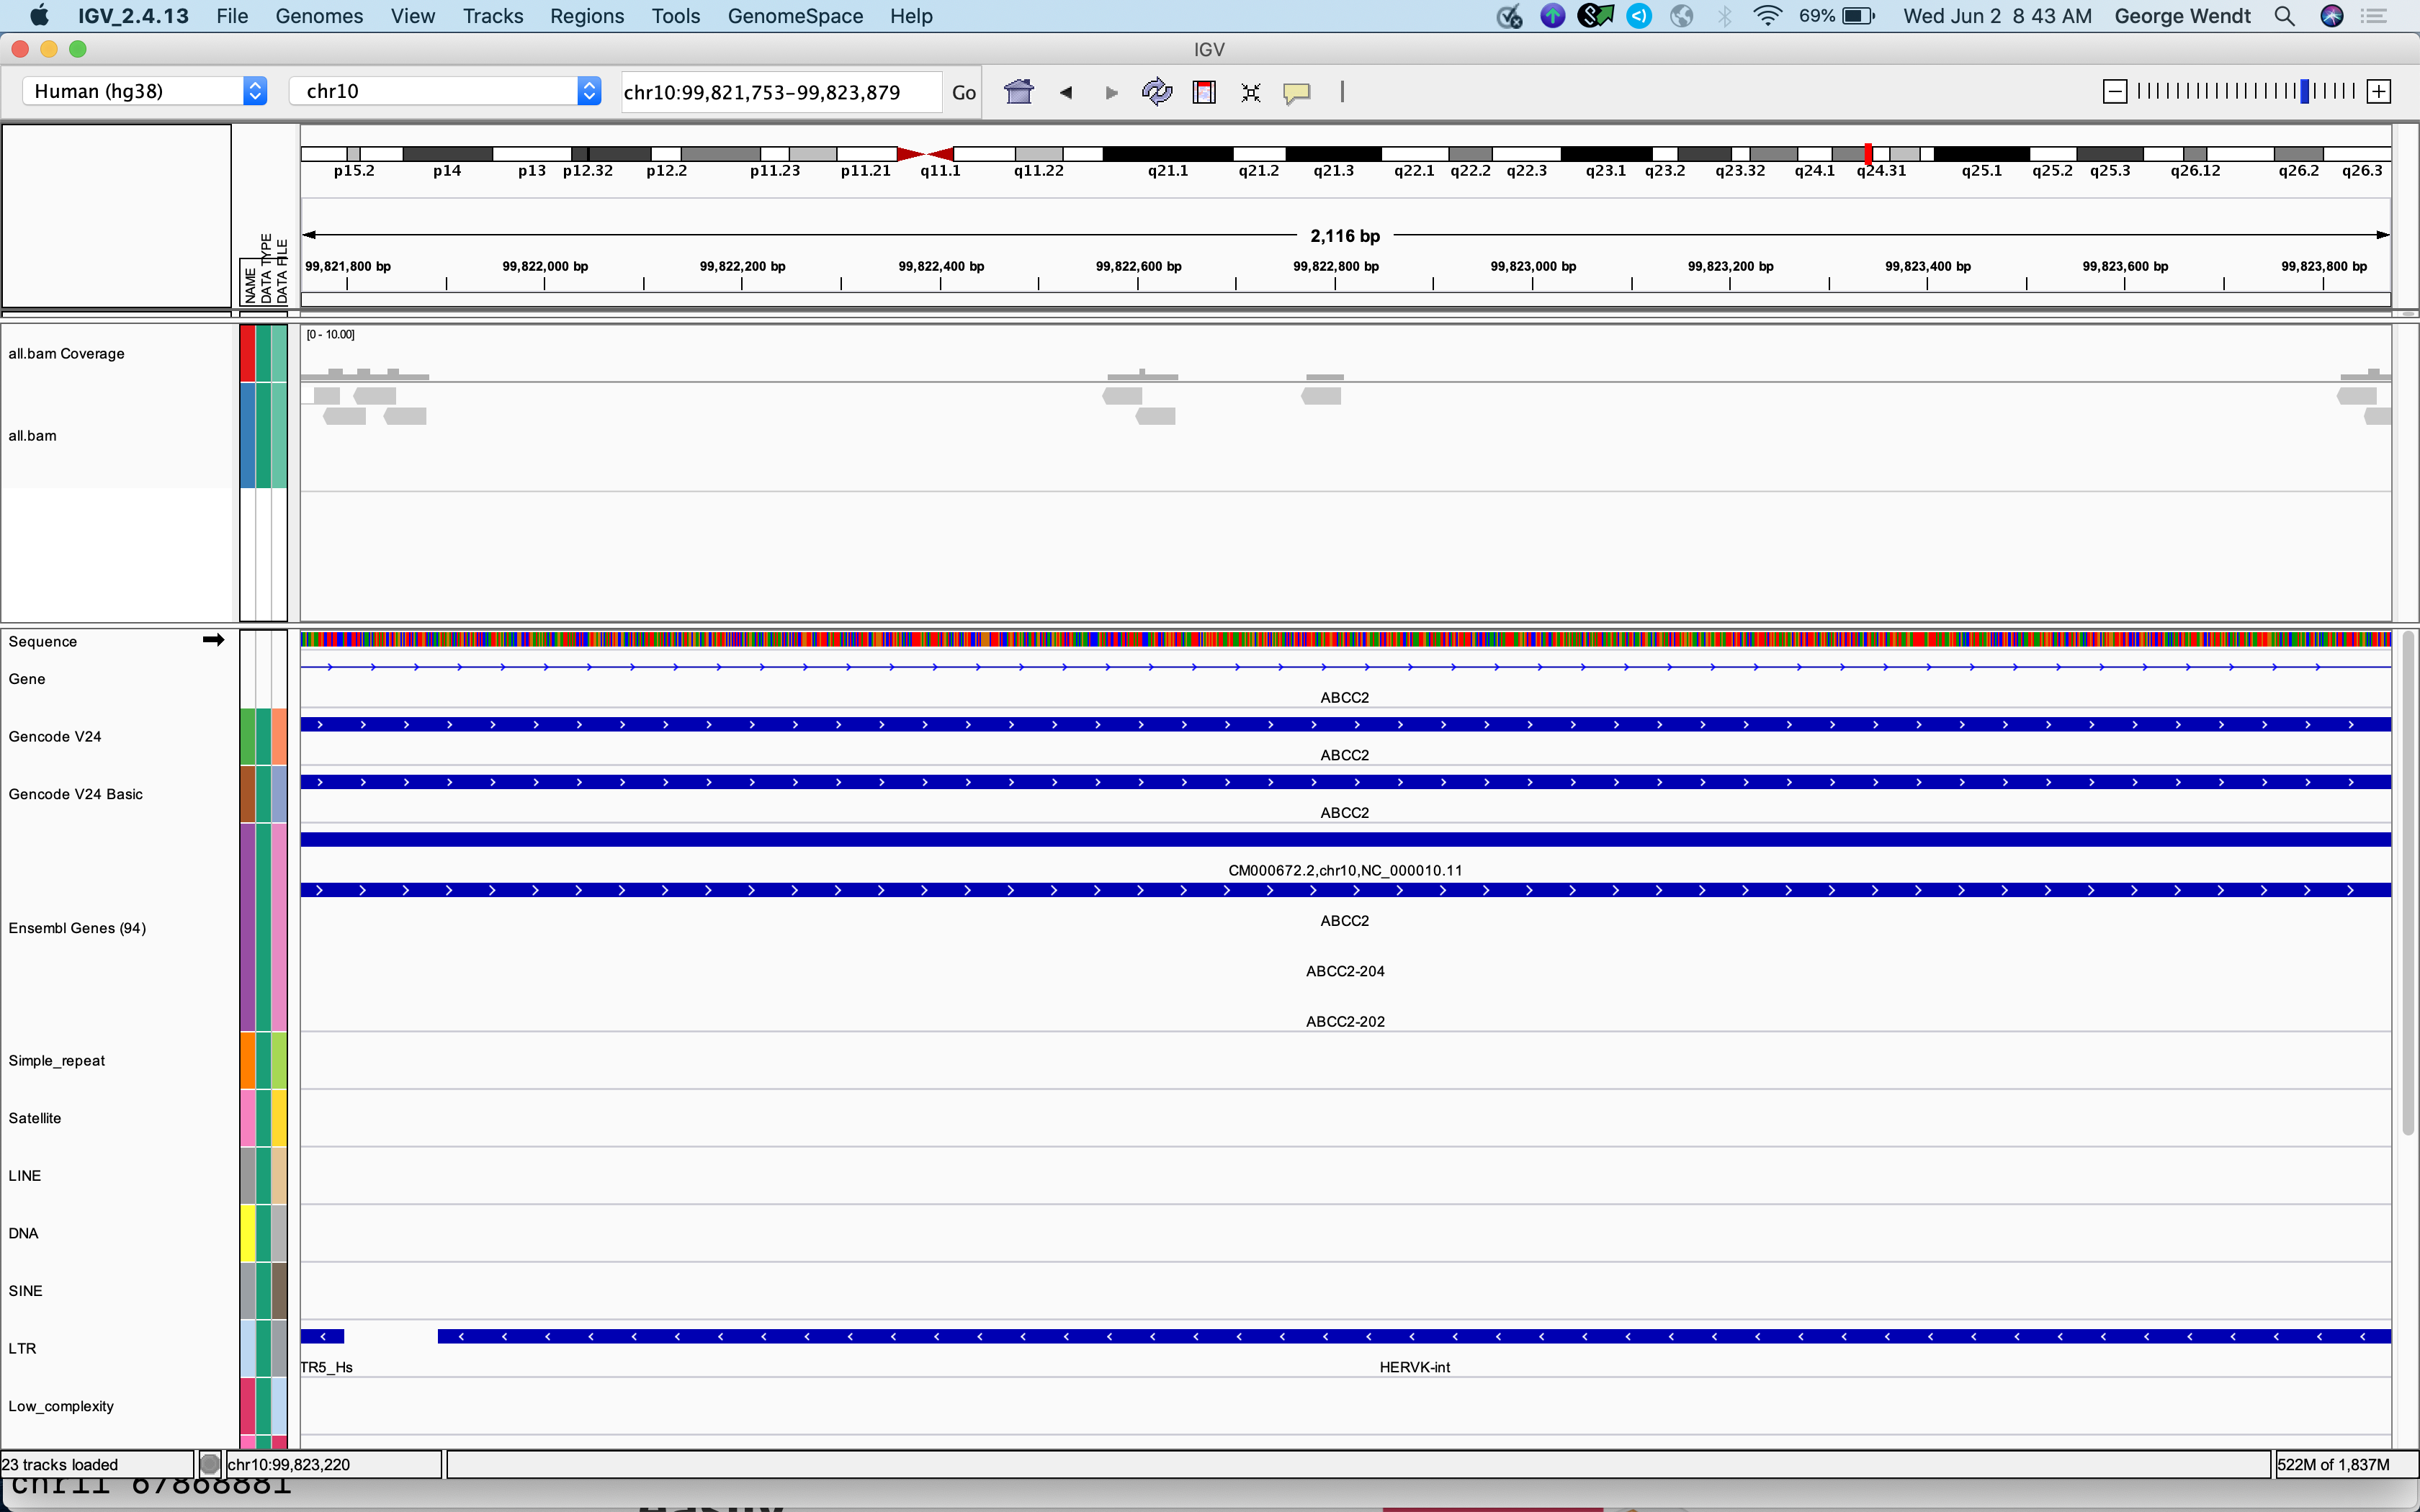

This is `chr22`

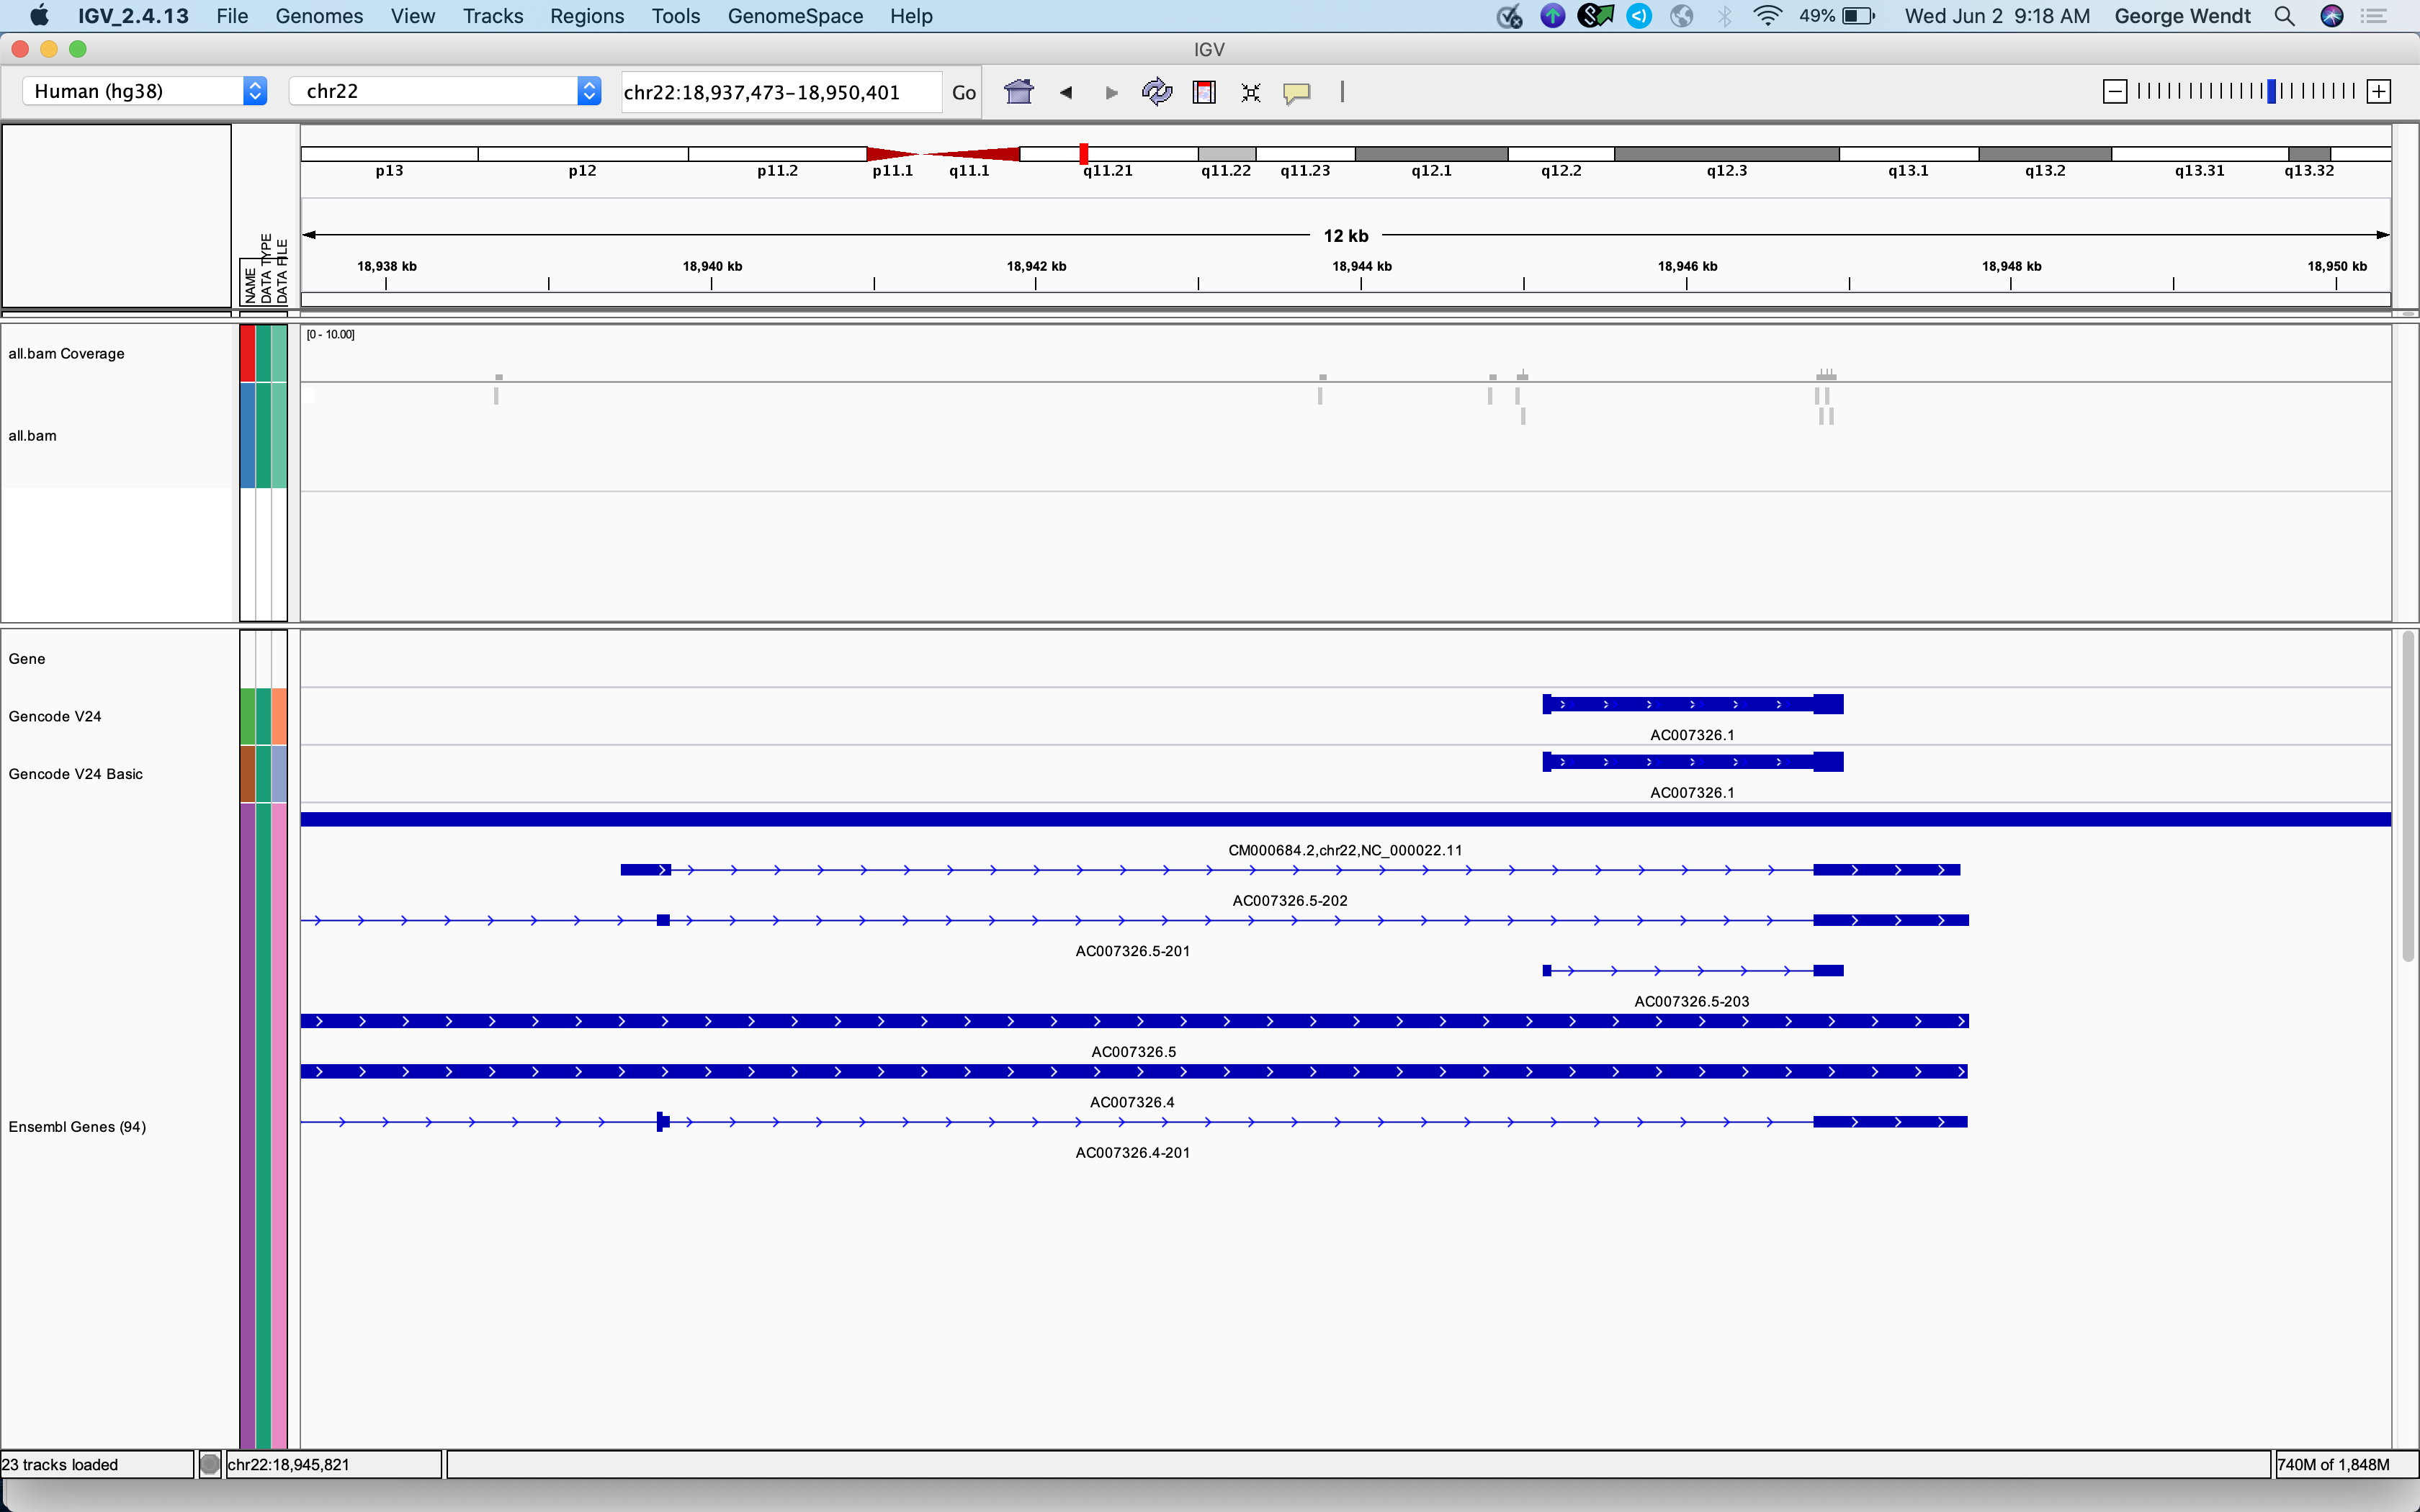

This is `chr12`

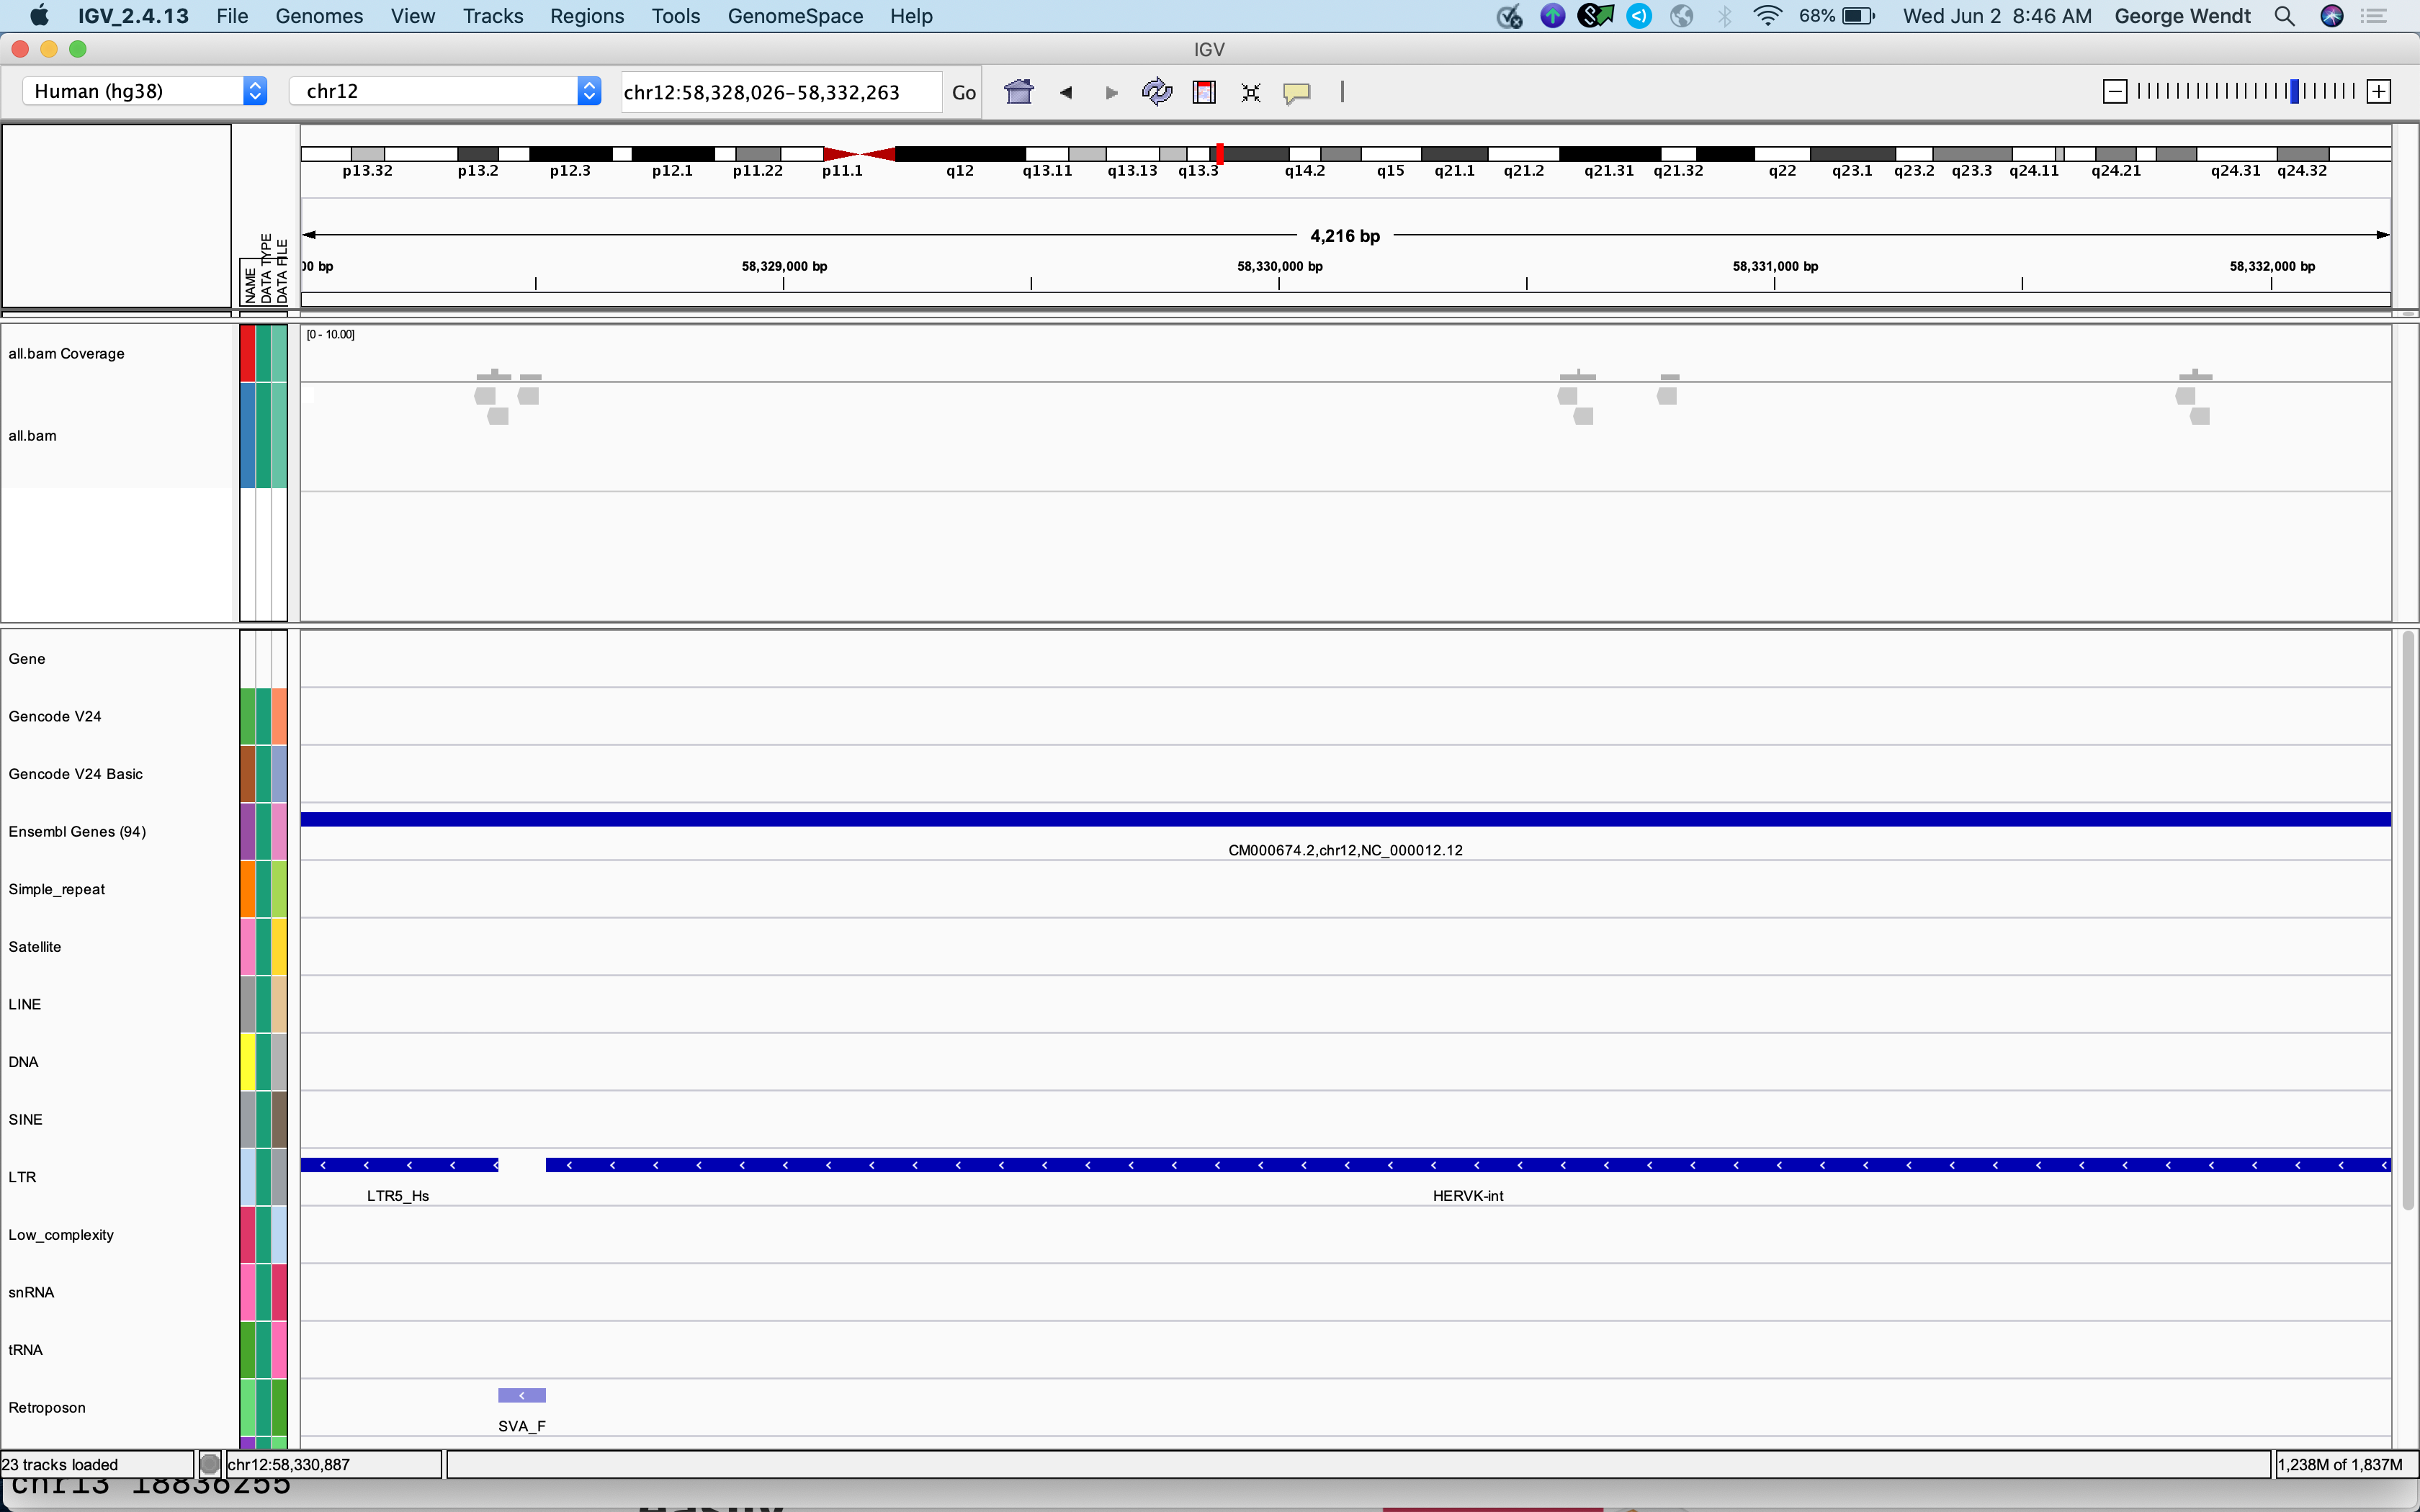

There are others, but these are the most prominent, exact match regions.